In [54]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
dis = pd.read_csv('DIS.csv', parse_dates=['Date'], index_col=['Date']).dropna()

benchmark_data = pd.read_csv('SP_benchmark.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

com = pd.read_csv('CMCSA.csv', parse_dates=['Date'], index_col=['Date']).dropna()

nflx = pd.read_csv('NFLX.csv', parse_dates=['Date'], index_col=['Date']).dropna()



In [55]:
dis =dis.drop(columns=['Open','High','Low','Close','Volume'])
com = com.drop(columns=['Open','High','Low','Close','Volume'])
nflx = nflx.drop(columns=['Open','High','Low','Close','Volume'])
benchmark_data = benchmark_data.drop(columns=['Open','High','Low','Close','Volume'])

In [56]:
dis = dis.rename(columns = {'Adj Close':'Disney'})
com = com.rename(columns = {'Adj Close': 'COM'})
nflx = nflx.rename(columns = {'Adj Close': 'NFLX'})
benchmark_data = benchmark_data.rename(columns = {'Adj Close': 'S&P'})

In [57]:
stock_data = dis.merge(com, how = 'outer', on = 'Date')
stock_data = stock_data.merge(nflx, how = 'inner', on = 'Date')
print(stock_data.head(3))


               Disney        COM        NFLX
Date                                        
2016-04-11  91.935265  28.681622  102.680000
2016-04-12  92.966644  28.812332  106.980003
2016-04-13  95.000725  28.919704  109.650002


In [59]:
# Display summary for stock_data
print('Stocks\n')
# ... YOUR CODE FOR TASK 2 HERE ...
stock_data.info()
# Display summary for benchmark_data
print('\nBenchmarks\n')
# ... YOUR CODE FOR TASK 2 HERE ...
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2016-04-11 to 2019-04-09
Data columns (total 3 columns):
Disney    755 non-null float64
COM       755 non-null float64
NFLX      755 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2016-04-11 to 2019-04-09
Data columns (total 1 columns):
S&P    755 non-null float64
dtypes: float64(1)
memory usage: 11.8 KB
                    S&P
Date                   
2016-04-11  2041.989990
2016-04-12  2061.719971
2016-04-13  2082.419922
2016-04-14  2082.780029
2016-04-15  2080.729980


In [60]:
print(stock_data.head())

               Disney        COM        NFLX
Date                                        
2016-04-11  91.935265  28.681622  102.680000
2016-04-12  92.966644  28.812332  106.980003
2016-04-13  95.000725  28.919704  109.650002
2016-04-14  94.188995  28.868355  110.419998
2016-04-15  94.150803  28.929039  111.510002


,Disney,COM,NFLX
count,755.000000,755.000000,755.000000
mean,103.134759,34.888166,217.824172
std,7.469735,3.275394,100.656638
min,87.370308,28.126099,85.330002
25%,97.225953,31.993161,130.194999
50%,103.124710,35.444382,186.820007
75%,109.561287,37.386055,321.130005
max,117.984825,41.818642,418.970001


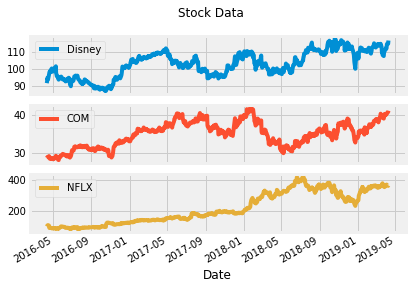

In [61]:
# visualize the stock_data
# ... YOUR CODE FOR TASK 3 HERE ...
stock_data.plot(subplots = True, title = 'Stock Data')

# summarize the stock_data
# ... YOUR CODE FOR TASK 3 HERE ...
stock_data.describe()

,S&P
count,755.000000
mean,2498.861297
std,257.758357
min,2000.540039
25%,2268.949951
50%,2506.959961
75%,2725.545044
max,2930.750000


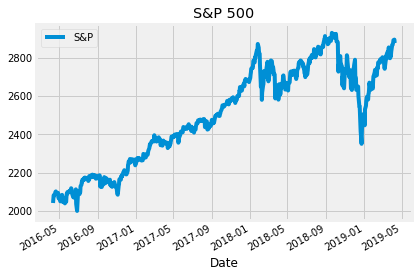

In [62]:
# plot the benchmark_data
# ... YOUR CODE FOR TASK 4 HERE ...

benchmark_data.plot(title = 'S&P 500')
# summarize the benchmark_data
# ... YOUR CODE FOR TASK 4 HERE ...
benchmark_data.describe()

,Disney,COM,NFLX
count,754.000000,754.000000,754.000000
mean,0.000376,0.000570,0.001987
std,0.010762,0.013745,0.024779
min,-0.052949,-0.073775,-0.131262
25%,-0.005083,-0.006454,-0.009497
50%,0.000102,0.000308,0.000672
75%,0.005864,0.007929,0.014031
max,0.054609,0.054904,0.190281


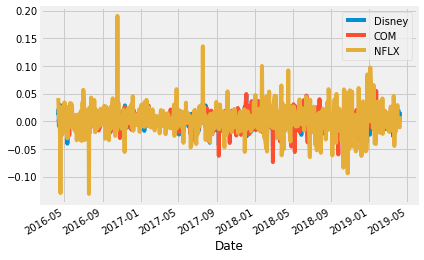

In [63]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.plot()

# summarize the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.describe()

count    754.000000
mean       0.000486
std        0.007868
min       -0.040979
25%       -0.002224
50%        0.000528
75%        0.004088
max        0.049594
Name: S&P, dtype: float64

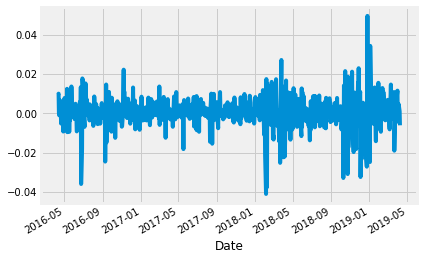

In [66]:
# calculate daily benchmark_data returns
# ... YOUR CODE FOR TASK 6 HERE ...
sp_returns = benchmark_data['S&P'].pct_change()

# plot the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...

sp_returns.plot()
# summarize the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...
sp_returns.describe()

,Disney,COM,NFLX
count,754.000000,754.000000,754.000000
mean,-0.000110,0.000084,0.001501
std,0.009007,0.012038,0.021504
min,-0.043565,-0.062246,-0.132789
25%,-0.005019,-0.006132,-0.008906
50%,-0.000024,-0.000185,0.000428
75%,0.004648,0.005902,0.011312
max,0.048273,0.052701,0.184120


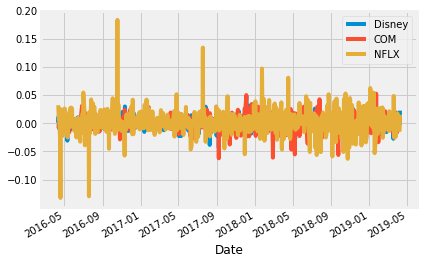

In [67]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)
type(excess_returns)
# plot the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...
excess_returns.plot()

# summarize the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...
excess_returns.describe()

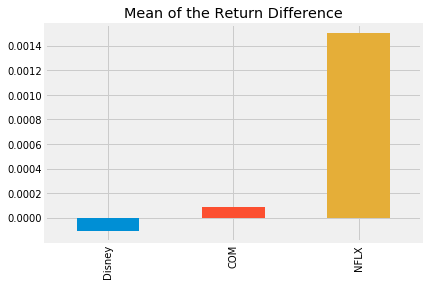

In [68]:
# calculate the mean of excess_returns 
# ... YOUR CODE FOR TASK 8 HERE ...
avg_excess_return = excess_returns.mean()
type(avg_excess_return)
# plot avg_excess_returns
# ... YOUR CODE FOR TASK 8 HERE ...
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')


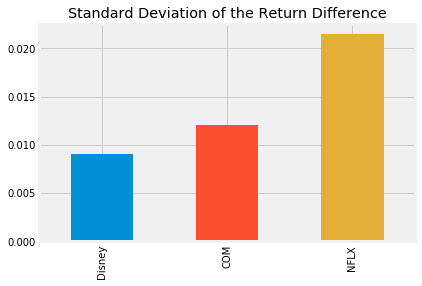

In [69]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
# ... YOUR CODE FOR TASK 9 HERE ...
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')

Disney   -0.194212
COM       0.110315
NFLX      1.107814
dtype: float64


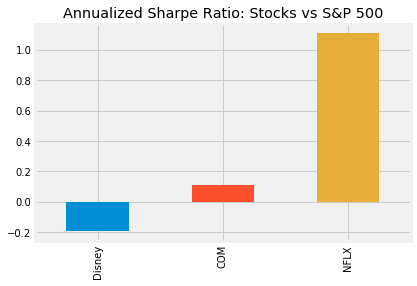

In [70]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
print(annual_sharpe_ratio.head())
# plot the annualized sharpe ratio
# ... YOUR CODE FOR TASK 10 HERE ...
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

In [ ]:
#it appears comcast would be worth according to this model.
